# sklearn 实现岭回归

0.4082224489795918
(16, 50)


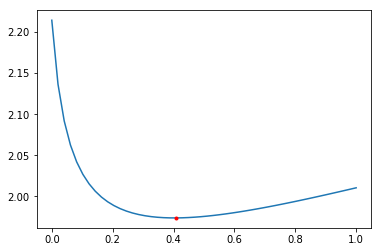

[88.11213631]


In [1]:
import numpy as np 
from sklearn import linear_model 
import matplotlib.pyplot as plt

#读取数据 
data = np.genfromtxt("longley.csv",delimiter=',')

# print(data)
#切分数据 
x_data=data[1:,2:] 
y_data=data[1:,1]

# print(x_data)
# print(y_data)
#创建模型

#生成50个值 代表岭回归系数，作为候选值 
alphas_to_test = np.linspace(0.0001,1)

#创建模型，保存误差值 
model = linear_model.RidgeCV(alphas=alphas_to_test,store_cv_values=True)
#岭回归 交叉验证 
model.fit(x_data,y_data)

#岭系数 
print(model.alpha_)

#loss值 
print(model.cv_values_.shape)#样本个数 * 岭系数的个数

#画图

#岭系数和loss值之间的关系 
plt.plot(alphas_to_test,model.cv_values_.mean(axis=0))

#选取的岭系数值的位置 
plt.plot(model.alpha_,min(model.cv_values_.mean(axis=0)),'r.') 
plt.show()

#预测 
print(model.predict(x_data[2,np.newaxis]))

# 标准方程法实现岭回归

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

#读取数据 
data = np.genfromtxt("longley.csv",delimiter=',')

# print(data)
#切分数据 
x_data=data[1:,2:] 
y_data=data[1:,1,np.newaxis]

#给样本添加偏置
X_data = np.concatenate((np.ones((16,1)),x_data),axis=1)
# print(X_data.shape)

# 岭回归标准方程法求解回归参数
def weights(xArr,yArr,lam=0.4):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    xTx = xMat.T*xMat #矩阵乘法
    rxTx = xTx + np.eye(xMat.shape[1])*lam
    #计算矩阵的值，如果为0，说明该矩阵没有逆矩阵
    if np.linalg.det(rxTx) == 0.0:
        print("This matrix cannot do inverse")
        return 
    #存在逆矩阵
    ws = rxTx.I*xMat.T*yMat
    return ws

ws = weights(X_data,y_data)
# print(ws)

#计算预测值
np.mat(X_data[2])*np.mat(ws)

matrix([[88.10951038]])